# Project 4

#### Group members:<br>
Yihang Sun<br>
Yuxiao Shen

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Assign column names to each column while importing dataset from GitHub repository
column_names= ['classes', 'cap-shape', 'cap-surface', 'cap-color','bruises','odor','gill-attachment','gill-spacing',
               'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
               'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color',
               'population','habitat']
file='https://raw.githubusercontent.com/YihangSun123/DAV5400/main/agaricus-lepiota.data'

# Read a csv file into DataFrame
df = pd.read_csv(file, names=column_names)
df

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis

## Introduction

The dataset we are using is from UCI Mushroom Data Set https://archive.ics.uci.edu/ml/datasets/mushroom. In this mushroom dataset, there are 8124 rows and 22 attributes. We will research the relationship between odor, bruises, habitat, and poisonous of mushrooms. We will build predictive models to determine which of the predictor columns (odor, bruises, and habitat) most accurately predicts whether or not a mushroom is poisonous.

## Data dictionary

| columns | description |
| :------: | - |
| classes | edible=e, poisonous=p |
| cap-shape |  bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s |
| cap-surface | fibrous=f,grooves=g,scaly=y,smooth=s |
| cap-color | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y |
| bruises | bruises=t,no=f |
| odor | almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s |
| gill-attachment | attached=a,descending=d,free=f,notched=n |
| gill-spacing | close=c,crowded=w,distant=d |
| gill-size | broad=b,narrow=n |
| gill-color | black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y |
| stalk-shape | enlarging=e,tapering=t |
| stalk-root | bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-color-above-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| stalk-color-below-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| veil-type | partial=p,universal=u |
| veil-color | brown=n,orange=o,white=w,yellow=y |
| ring-number | none=n,one=o,two=t |
| ring-type | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z |
| spore-print-color | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y |
| population | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y |
| habitat | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d |

In [3]:
# Check the data type of each column
df.dtypes

classes                     object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## Create a pandas DataFrame with a subset of the columns in the dataset. Here we include the classes that indicate edible or poisonous, as well as odor, bruises, and habitat for our DatFrame

In [4]:
df1 = df.loc[:,['classes','odor','bruises','habitat'] ]
df1

,classes,odor,bruises,habitat
0,p,p,t,u
1,e,a,t,g
2,e,l,t,m
3,p,p,t,u
4,e,n,f,g
...,...,...,...,...
8119,e,n,f,l
8120,e,n,f,l
8121,e,n,f,l
8122,p,y,f,l


## Convert the “e”/”p” indicators in the first column to digits: The “e” becomes 0 and “p” becomes 1.

In [5]:
df1['classes'].replace('e', '0', inplace=True)
df1

,classes,odor,bruises,habitat
0,p,p,t,u
1,0,a,t,g
2,0,l,t,m
3,p,p,t,u
4,0,n,f,g
...,...,...,...,...
8119,0,n,f,l
8120,0,n,f,l
8121,0,n,f,l
8122,p,y,f,l


In [6]:
df1['classes'].replace('p', '1', inplace=True)
df1

,classes,odor,bruises,habitat
0,1,p,t,u
1,0,a,t,g
2,0,l,t,m
3,1,p,t,u
4,0,n,f,g
...,...,...,...,...
8119,0,n,f,l
8120,0,n,f,l
8121,0,n,f,l
8122,1,y,f,l


## Create a set of dummy variables for each of the other columns in the DataFrame

In [7]:
df2 = pd.get_dummies(df1,columns=['odor', 'bruises', 'habitat'])
df2

,classes,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


## Exploratory Data Analysis

count     8124
unique       2
top          0
freq      4208
Name: classes, dtype: object

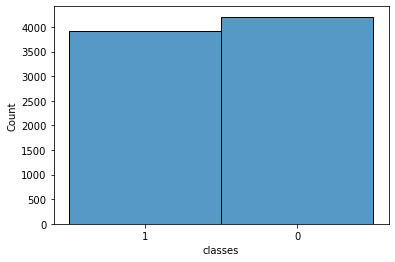

In [8]:
# Create a histogram to show the distribution of classes column
sns.histplot(data=df1, x='classes')
df1['classes'].describe()

The histogram above shows there are more edible mushrooms (0) than poisonous mushrooms (1) in the dataset

count     8124
unique       9
top          n
freq      3528
Name: odor, dtype: object

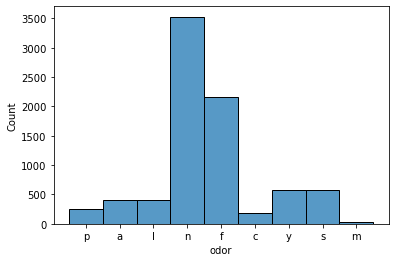

In [9]:
# Create a histogram to show the distribution of odor column
sns.histplot( data=df, x='odor')
df1['odor'].describe()

The histogram above shows the smell-less mushrooms have the largest amount compare with other types of odor. The quantity of foul mushrooms is more than half of the smell-less mushrooms. The rest types of odor has much lower quantities.

count     8124
unique       2
top          f
freq      4748
Name: bruises, dtype: object

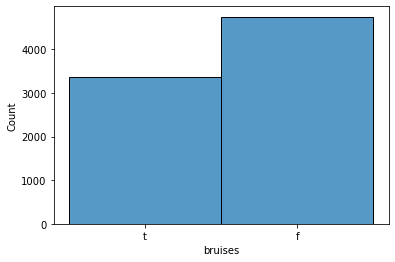

In [10]:
# Create a histogram to show the distribution of bruises column
sns.histplot( data=df, x='bruises')
df1['bruises'].describe()

The histogram above shows there are more none bruises mushrooms (f) than bruises mushrooms (t).

count     8124
unique       7
top          d
freq      3148
Name: habitat, dtype: object

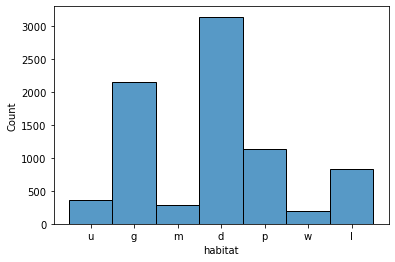

In [11]:
# Create a histogram to show the distribution of habitat column
sns.histplot( data=df, x='habitat')
df1['habitat'].describe()

The histogram above shows the mushrooms that is grew out of woods have the largest quantity which is more than 3,000. Followed by the mushrooms that is grew out of grasses which is more than 2,000. The rest types of habitat have much lower quantities.

The legends below: "p" represents poisonous mushrooms and "e" represents edible mushrooms.

<AxesSubplot:xlabel='odor', ylabel='Count'>

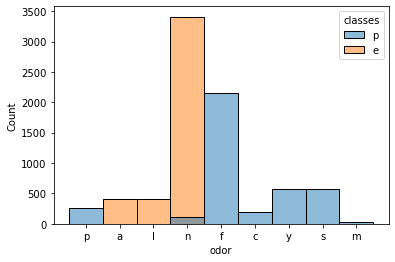

In [12]:
sns.histplot(x="odor", hue="classes", data=df)

The histogram above shows that pungent, foul, creosote, fishy, spicy, musty are poisonous and almond, anise are edible. For the smell-less mushrooms, most smell-less mushrooms are edible, and a few of them are poisonous (the grey area).

<AxesSubplot:xlabel='bruises', ylabel='Count'>

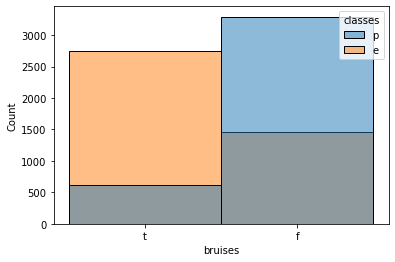

In [13]:
sns.histplot(x="bruises", hue="classes", data=df)

The histogram above shows that bruises mushroom have more edible mushrooms and none-bruises mushrooms have more poisonous mushrooms.

<AxesSubplot:xlabel='habitat', ylabel='Count'>

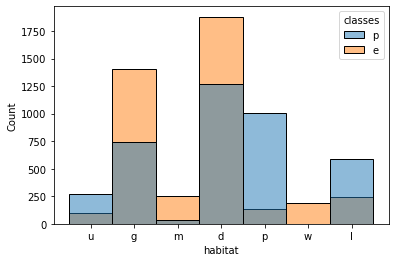

In [14]:
sns.histplot(x="habitat", hue="classes", data=df)

The histogram above shows that meadows and waste have more edible mushrooms. Other habitats have more poisonous mushrooms. 

# Phase II: Build Predictive Models

Which accurately predicts whether or not a mushroom is poisonous?

In [15]:
# Here we bring out the DataFrame with dummy variables again.
df2

,classes,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [16]:
# Chech the shape of the DataFrame
df2.shape

(8124, 19)

In [17]:
df2.classes.describe()

count     8124
unique       2
top          0
freq      4208
Name: classes, dtype: object

In [18]:
4208/df2.shape[0]

0.517971442639094

Edible mushrooms is 51.80%

## Odor

In [19]:
odor = df2[['odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y']]
odor

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0
8120,0,0,0,0,0,1,0,0,0
8121,0,0,0,0,0,1,0,0,0
8122,0,0,0,0,0,0,0,0,1


In [20]:
y=df2['classes']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: classes, Length: 8124, dtype: object

In [21]:
#Train-Test Split. Reference: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
train_x,test_x,train_y,test_y = train_test_split(odor, y, test_size=0.33)

In [22]:
train_x

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
3783,0,0,1,0,0,0,0,0,0
6010,0,0,1,0,0,0,0,0,0
5558,0,0,0,0,0,0,0,1,0
633,0,0,0,1,0,0,0,0,0
2345,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5393,0,0,1,0,0,0,0,0,0
3776,0,0,0,0,0,1,0,0,0
969,0,0,0,0,0,1,0,0,0
1689,0,0,0,0,0,1,0,0,0


In [23]:
test_x

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
3766,0,0,0,0,0,1,0,0,0
3365,0,1,0,0,0,0,0,0,0
1971,0,0,0,0,0,1,0,0,0
284,0,0,0,1,0,0,0,0,0
2776,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1837,0,0,0,0,0,1,0,0,0
5271,0,0,0,0,0,1,0,0,0
4315,0,0,1,0,0,0,0,0,0
5454,0,0,1,0,0,0,0,0,0


In [24]:
#Using logistic regression model
ordr_model = LogisticRegression()

In [25]:
ordr_model=ordr_model.fit(train_x,train_y)

In [26]:
ordr_model.score(train_x, train_y)

0.9865882785228735

In [27]:
ordr_model.score(test_x, test_y)

0.9824692279000373

In [28]:
ordr_model.coef_

array([[-5.61558923,  2.29339729,  4.10409541, -5.61558923,  1.32574034,
        -5.11966562,  2.46406374,  3.08383616,  3.07992498]])

Mushroom odor that are almond, anise, and none are more likely edible. Mushroom odor that are creosote, foul, musty, pungent, spicy, and fishy are more likely poisonous.

## Bruises

In [29]:
bruises=df2[['bruises_f','bruises_t']]
bruises

,bruises_f,bruises_t
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,1,0


In [30]:
#Train-Test Split
train_x,test_x,train_y,test_y = train_test_split(bruises, y, test_size=0.33)

In [31]:
train_x

,bruises_f,bruises_t
3621,1,0
7755,1,0
6843,1,0
4027,1,0
6535,1,0
...,...,...
2364,0,1
1150,1,0
1281,1,0
5700,1,0


In [32]:
#Using logistic regression model
bruises_model = LogisticRegression()

In [33]:
bruises_model =bruises_model .fit(train_x,train_y)

In [34]:
bruises_model.score(train_x, train_y)

0.7418702921183171

In [35]:
bruises_model.score(test_x, test_y)

0.7482282730324505

In [36]:
bruises_model.coef_

array([[ 1.13505383, -1.13500894]])

Bruises mushrooms is more likely edible. None bruises mushrooms is more likely poisonous.

## Habitat

In [37]:
habitat=df2[['habitat_d','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w']]
habitat

,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0


In [38]:
#Train-Test Split
train_x,test_x,train_y,test_y = train_test_split(habitat, y, test_size=0.33)
train_x

,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8115,0,0,1,0,0,0,0
3649,0,0,0,0,1,0,0
1911,1,0,0,0,0,0,0
4046,1,0,0,0,0,0,0
177,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
4472,0,1,0,0,0,0,0
4829,1,0,0,0,0,0,0
5605,0,0,0,1,0,0,0
4256,0,1,0,0,0,0,0


In [39]:
#Using logistic regression model
habitat_model = LogisticRegression()

In [40]:
habitat_model =habitat_model .fit(train_x,train_y)

In [41]:
habitat_model.score(train_x, train_y)

0.6926327392981811

In [42]:
habitat_model.score(test_x, test_y)

0.6855650876538605

In [43]:
habitat_model.coef_

array([[-0.02867346, -0.31626415,  1.24272586, -1.45979104,  2.42121374,
         1.46432582, -3.32425222]])

Mushroom habitats that are woods, grasses, meadows, and waste are more likely edible.
Mushroom habitats that are leaves, paths, and urban are more likely poisonous.

## Conclusion

Mushrooms that have nice smells, bruises mushrooms, and mushrooms that grew out of woods, grasses, meadows, and waste are generally edible. The classification of the dataset attributes is detailed. 